**DATA ANALYSIS ON SOUTH KOREA COVID-19 DATA ANALYSIS AND DISPLAYING THE RESULTS IN WEB USING FLASK FRAMEWORK**

**UNZIPPING THE DATASET**

In [ ]:
!unzip 527325_1205308_bundle_archive.zip

Archive:  527325_1205308_bundle_archive.zip
  inflating: Case.csv                
  inflating: PatientInfo.csv         
  inflating: PatientRoute.csv        
  inflating: Policy.csv              
  inflating: Region.csv              
  inflating: SearchTrend.csv         
  inflating: SeoulFloating.csv       
  inflating: Time.csv                
  inflating: TimeAge.csv             
  inflating: TimeGender.csv          
  inflating: TimeProvince.csv        
  inflating: Weather.csv             


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 

In [ ]:
df1=pd.read_csv('Case.csv')
df1.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652
1,1000002,Seoul,Guro-gu,True,Guro-gu Call Center,99.0,37.508163,126.884387
2,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20.0,37.592888,127.056766
3,1000004,Seoul,Guro-gu,True,Manmin Central Church,41.0,37.481059,126.894343
4,1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14.0,37.63369,126.9165


**UNDERSTANDING THE FEATURES OR COLUMNS**
* **Case_id=The ID of the infection case**
* **Province=A province is almost always an administrative division within a country or state**
* **city=City refers to large town**
* **group= If all these infections occured when there are in group means True else group False**
* **infection_case=The name of group there are in or group responsible for the infection**
* **confirmed	=The accumulated number of the confirmed cases**
* **latitude=The Latitude of group**
* **longitude=The Longitude of group**

**IDENTIFYING THE DATA TYPES OF EACH COLUMN OF DATA FRAME**

In [ ]:
print("Data type of movie_id",type(df1['case_id'].values[0]))
print("Data type of user_id",type(df1['province'].values[0]))
print("Data type of rating",type(df1['city'].values[0]))
print("Data type of date",type(df1['group'].values[0]))
print("Data type of date",type(df1['infection_case'].values[0]))
print("Data type of date",type(df1['confirmed'].values[0]))
print("Data type of date",type(df1['latitude'].values[0]))
print("Data type of date",type(df1['longitude'].values[0]))

Data type of movie_id <class 'numpy.int64'>
Data type of user_id <class 'str'>
Data type of rating <class 'str'>
Data type of date <class 'numpy.bool_'>
Data type of date <class 'str'>
Data type of date <class 'numpy.float64'>
Data type of date <class 'str'>
Data type of date <class 'str'>


**Checking For Missing Values**

In [ ]:
#https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
#Check for Missing values
print("No of Missing values in Dataset : ", sum(df1.isnull().any()))

No of Missing values in Dataset :  1


**Checking For Which column has Missing Value**

In [ ]:
df1.columns[df1.isnull().any()]

Index(['confirmed'], dtype='object')

**Dropping The Row Of Missing Values**

In [ ]:
#https://thispointer.com/pandas-drop-rows-from-a-dataframe-with-missing-values-or-nan-in-columns/
df1 = df1.dropna(how='any')

**Checking For Duplicate Values**

In [ ]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df1[df1.duplicated()]
"Number of Duplicate Row is",len(duplicateRowsDF)

('Number of Duplicate Row is', 0)

In [ ]:
df1.describe()

,case_id,confirmed
count,1.250000e+02,125.000000
mean,2.908805e+06,82.912000
std,2.043124e+06,417.445902
min,1.000001e+06,0.000000
25%,1.200006e+06,5.000000
50%,1.700006e+06,11.000000
75%,5.000003e+06,38.000000
max,7.000004e+06,4510.000000


**Converting 'confirmed' column to int type to perform analysis** 

In [ ]:
df1['confirmed'] = df1['confirmed'].astype(int)

In [ ]:
df1['confirmed']

0      133
1       99
2       20
3       41
4       14
      ... 
123     19
124     10
125      0
126      4
127      1
Name: confirmed, Length: 125, dtype: int64

In [ ]:
proviences={}
for i in df1['province'].unique():
  proviences[i]=0

for i in range(len(df1)):
  key=df1.iloc[i].loc['province']
  value=df1.iloc[i].loc['confirmed']
  proviences[key]=proviences[key]+value
print("Provience with number of confirmed cases")
proviences

Provience with number of confirmed cases


{'Busan': 149,
 'Chungcheongbuk-do': 44,
 'Chungcheongnam-do': 137,
 'Daegu': 6665,
 'Daejeon': 39,
 'Gangwon-do': 53,
 'Gwangju': 26,
 'Gyeonggi-do': 697,
 'Gyeongsangbuk-do': 1323,
 'Gyeongsangnam-do': 119,
 'Incheon': 183,
 'Jeju-do': 15,
 'Jeollabuk-do': 16,
 'Jeollanam-do': 20,
 'Sejong': 47,
 'Seoul': 781,
 'Ulsan': 50}

**Necessary For ploting**

In [ ]:
pos=[]
c=1
for j in proviences.keys():
  pos.append(str(c))
  c=c+1
d=dict(zip(pos,proviences.keys()))
d

{'1': 'Seoul',
 '10': 'Gangwon-do',
 '11': 'Chungcheongbuk-do',
 '12': 'Chungcheongnam-do',
 '13': 'Jeollabuk-do',
 '14': 'Jeollanam-do',
 '15': 'Gyeongsangbuk-do',
 '16': 'Gyeongsangnam-do',
 '17': 'Jeju-do',
 '2': 'Busan',
 '3': 'Daegu',
 '4': 'Gwangju',
 '5': 'Incheon',
 '6': 'Daejeon',
 '7': 'Ulsan',
 '8': 'Sejong',
 '9': 'Gyeonggi-do'}

## <font color='red'>Pie Chart find Provience To That has highest number of confirmed Cases</font>

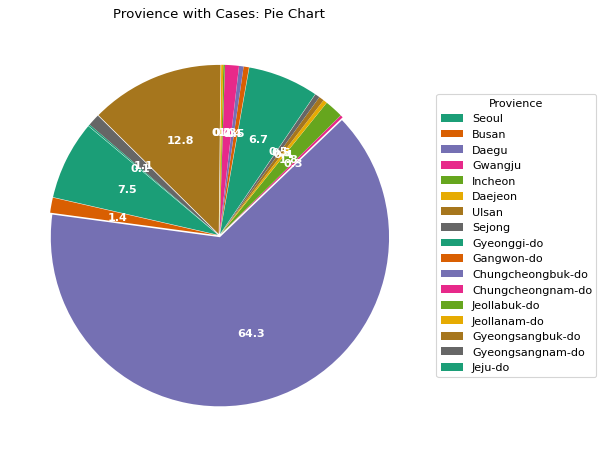

In [ ]:

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = list(proviences.values())
categories =list(proviences.keys())
explode = [0.01]*(17)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}".format(pct)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Provience", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Provience with Cases: Pie Chart")
plt.show()
fig.savefig('provience_case.jpg')
plt.close()

## <font color='BULE'>DAEGU IS THE PROVIENCE WHICH HAS 64.3% OF CONFIRMED CASES IN SOUTH KOREA</font>
## <font color='BULE'>SO THE PEOPLE OF DAEGU PROVIENCE SHOULD BE VERY CAREFUL TILL THIS INFECTION ENDS </font>

**BAR PLOT AND PIE PLOT TO FIND The infection Spread in Groups and Non Groups**

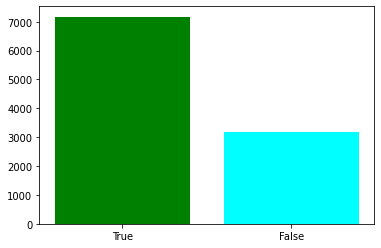

In [ ]:
import matplotlib.pyplot as plt
labels = ['True','False']
size=[0,0]
for i in range(len(df1)):
  if df1.iloc[i].loc['group']==True:
    size[0]=size[0]+df1.iloc[i].loc['confirmed']
  else:
    size[1]=size[1]+df1.iloc[i].loc['confirmed']
fig, ax = plt.subplots()
ax.bar(labels, size, color=['green',  'cyan'])
plt.show()
fig.savefig('groups_bar.jpg')

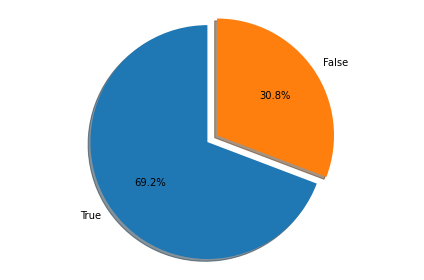

In [ ]:
 #Pie chart

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(size, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
fig1.savefig('groups_pie.jpg')

## <font color='BULE'>Groups are highly responisible for the infection spread</font>
## <font color='BULE'>So there is the high chance the you will be infected if you are not isolated from various groups

**FINDING THE EPICENTER FOR INFECTION SPREAD**

In [ ]:
groups={}
for i in df1['infection_case'].unique():
  groups[i]=0

for i in range(len(df1)):
  key=df1.iloc[i].loc['infection_case']
  value=df1.iloc[i].loc['confirmed']
  groups[key]=groups[key]+value
groups

{'Bonghwa Pureun Nursing Home': 68,
 'Bundang Jesaeng Hospital': 22,
 'Changnyeong Coin Karaoke': 7,
 'Cheongdo Daenam Hospital': 123,
 'Coupang Logistics Center': 109,
 'Daesil Convalescent Hospital': 100,
 'Dongan Church': 20,
 "Eunpyeong St. Mary's Hospital": 14,
 'Fatima Hospital': 37,
 'Geochang Church': 10,
 'Geochang-gun Woongyang-myeon': 8,
 'Goesan-gun Jangyeon-myeon': 11,
 'Guro-gu Call Center': 167,
 'Gyeongsan Cham Joeun Community Center': 16,
 'Gyeongsan Jeil Silver Town': 17,
 'Gyeongsan Seorin Nursing Home': 66,
 'Haeundae-gu Catholic Church': 6,
 'Hanmaeum Changwon Hospital': 7,
 'Hansarang Convalescent Hospital': 128,
 'Itaewon Clubs': 253,
 'Jin-gu Academy': 4,
 'Jongno Community Center': 10,
 'Jung-gu Fashion Company': 7,
 'Korea Campus Crusade of Christ': 8,
 'Korea Forest Engineer Institute': 3,
 'Manmin Central Church': 43,
 'Milal Shelter': 36,
 'Ministry of Oceans and Fisheries': 30,
 'Onchun Church': 41,
 'Pilgrimage to Israel': 49,
 'River of Grace Community C

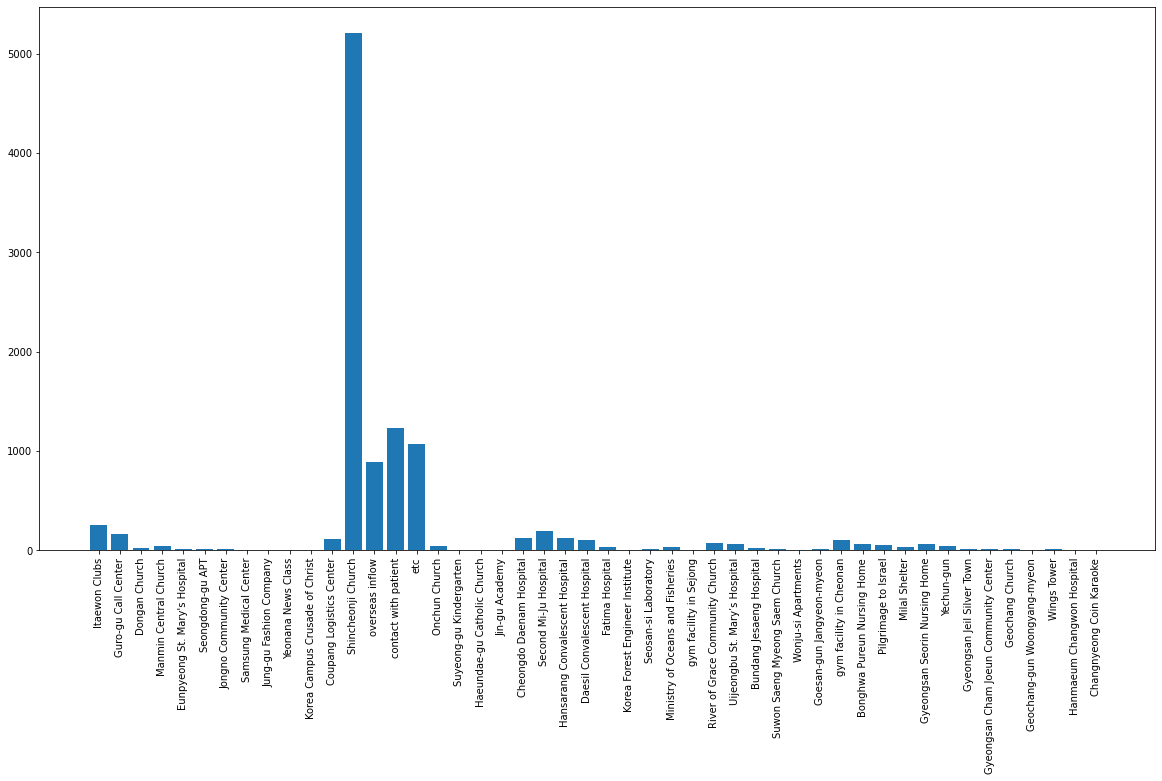

In [ ]:
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.bar(groups.keys(), groups.values())
plt.xticks(rotation=90)
plt.show()
fig.savefig('epiccenter_bar.png')

## <font color='GREEN'>Shincheonji Church Is THE EPI CENTER IN SOUTH KOREA For The Infection Spread</font>
## <font color='orange'>Contant With Patient Is Also The Main Reason For The Infection Spread</font>

In [ ]:
df2=pd.read_csv('PatientInfo.csv')
df2.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


**Since we have very little amount of data so lets us try not to remove any data points from the data frame instead**

In [ ]:
#https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
for i in df2.columns:
  df2[i].fillna("No Data", inplace = True)

In [ ]:
dff2= df2.groupby('age').size().reset_index(name='counts')
dff2

,age,counts
0,0s,60
1,100s,1
2,10s,160
3,20s,860
4,30,1
5,30s,493
6,40s,483
7,50s,625
8,60s,423
9,70s,210


**Here age is in str type so convert into int type and alos remove 's' from int and also remove last row because it is a missing Data**

In [ ]:
#https://www.edureka.co/community/43220/how-to-change-update-cell-value-in-python-pandas-dataframe
dff2= df2.groupby('age').size().reset_index(name='counts')
dff2=dff2[:-1]                       # to remove last row
for i in range(len(dff2)):
  x=dff2.iloc[i].loc['age']
  dff2.at[i,'age']=int(x.split('s')[0])

dff2.sort_values('age', inplace=True)  # sorting values based on age   
dff2.reset_index(inplace=True)
dff2

,index,age,counts
0,0,0,60
1,2,10,160
2,3,20,860
3,4,30,1
4,5,30,493
5,6,40,483
6,7,50,625
7,8,60,423
8,9,70,210
9,10,80,162


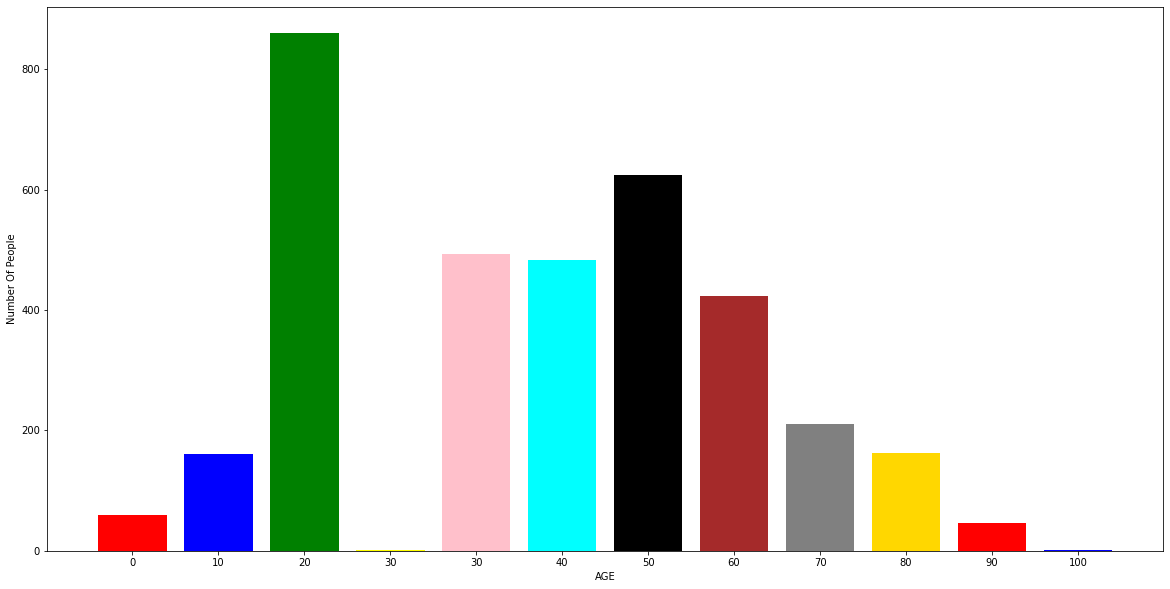

In [ ]:
fig1, ax1 = plt.subplots(figsize=(20,10))
labels=dff2['age'].values
values=dff2['counts'].values

pos=list(range(len(labels)))
ax1.bar(pos, values, color=['red','blue','green','yellow','pink' ,'cyan','black','brown','gray'])
plt.xticks(pos,labels)
plt.xlabel("AGE")
plt.ylabel("Number Of People")
plt.show()
fig1.savefig('age_bar.jpg')

## <font color='orange'>Most of Patients who are infected are around the age group of 20 years</font>
## <font color='orange'>Here Roughly speaking all the age group are effected by the infection so no age is immune to this infection</font>

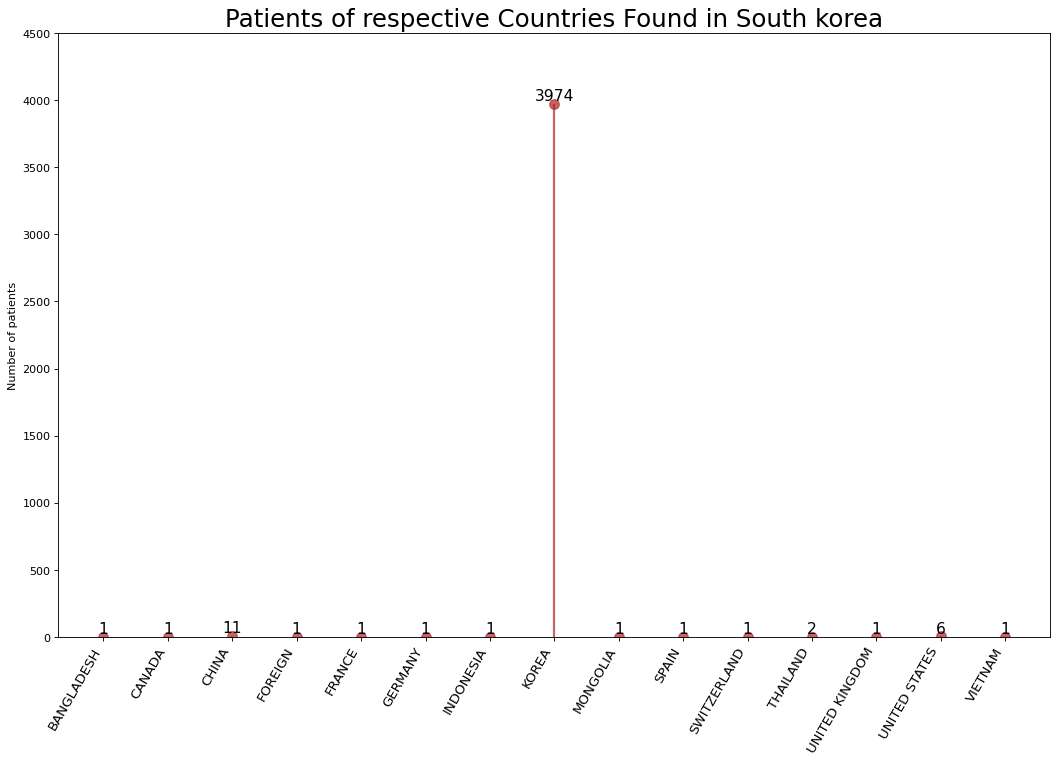

In [ ]:
dff2= df2.groupby('country').size().reset_index(name='counts')
dff2.sort_values('country', inplace=True)
dff2.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=dff2.index, ymin=0, ymax=dff2.counts, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=dff2.index, y=dff2.counts, s=75, color='firebrick', alpha=0.7)

ax.set_title('Patients of respective Countries Found in South korea', fontdict={'size':22})
ax.set_ylabel('Number of patients')
ax.set_xticks(dff2.index)
ax.set_xticklabels(dff2.country.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 4500)

for row in dff2.itertuples():
    ax.text(row.Index, row.counts+.5, s=round(row.counts, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()
fig.savefig('patientsdiff.jpg')

## <font color='violet'>As Expected since all these Cases are in south Korea we can see almost all the effected people are from same country iteself and very few people from other countries</font>

In [ ]:
df3=pd.read_csv('PatientRoute.csv')
df3.head()

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534


**Since we have very little amount of data so lets us try not to remove any data points from the data frame instead**

In [ ]:
#https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
for i in df3.columns:
  df3[i].fillna("No Data", inplace = True)

**Here Patient id is common in both data frames so join both these Frames**

In [ ]:
dff= pd.merge(df2,df3)
dff.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,date,type,latitude,longitude
0,1000000002,5,male,1987,30s,Korea,Seoul,Jungnang-gu,No Data,overseas inflow,1,No Data,31,No Data,2020-01-30,2020-03-02,No Data,released,2020-01-28,store,37.588923,127.076681
1,1000000002,5,male,1987,30s,Korea,Seoul,Jungnang-gu,No Data,overseas inflow,1,No Data,31,No Data,2020-01-30,2020-03-02,No Data,released,2020-01-28,restaurant,37.589035,127.091943
2,1000000002,5,male,1987,30s,Korea,Seoul,Jungnang-gu,No Data,overseas inflow,1,No Data,31,No Data,2020-01-30,2020-03-02,No Data,released,2020-01-29,hospital,37.606560,127.092652
3,1000000002,5,male,1987,30s,Korea,Seoul,Jungnang-gu,No Data,overseas inflow,1,No Data,31,No Data,2020-01-30,2020-03-02,No Data,released,2020-01-30,hospital,37.612772,127.098167
4,1000000003,6,male,1964,50s,Korea,Seoul,Jongno-gu,No Data,contact with patient,2,2002000001,17,No Data,2020-01-30,2020-02-19,No Data,released,2020-01-26,church,37.586288,126.999716


**Here By Analysis we see that there are many Missing Values in disease,symptom_onset_date,deceased_date,birth_year,age,infection_order and contact_number so lets remove these features from our Data Frame**

In [ ]:
dff=dff.drop(['disease','symptom_onset_date','deceased_date','birth_year','age','infection_order','contact_number'], axis = 1) 

**IDENTIFYING THE DATA TYPES OF EACH COLUMN OF DATA FRAME**

In [ ]:
for i in dff.columns:
  print("Data Type of",i,type(dff[i].values[0]))

Data Type of patient_id <class 'numpy.int64'>
Data Type of global_num <class 'float'>
Data Type of sex <class 'str'>
Data Type of country <class 'str'>
Data Type of province <class 'str'>
Data Type of city <class 'str'>
Data Type of infection_case <class 'str'>
Data Type of infected_by <class 'str'>
Data Type of confirmed_date <class 'str'>
Data Type of released_date <class 'str'>
Data Type of state <class 'str'>
Data Type of date <class 'str'>
Data Type of type <class 'str'>
Data Type of latitude <class 'numpy.float64'>
Data Type of longitude <class 'numpy.float64'>


**Checking For Missing Values**

In [ ]:
#https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
#Check for Missing values
print("No of Missing values in Dataset : ", sum(dff.isnull().any()))

No of Missing values in Dataset :  0


**Checking For Duplicate Values**

In [ ]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df1[df1.duplicated()]
"Number of Duplicate Row is",len(duplicateRowsDF)

('Number of Duplicate Row is', 0)

In [ ]:
dff.head()

,patient_id,global_num,sex,country,province,city,infection_case,infected_by,confirmed_date,released_date,state,date,type,latitude,longitude
0,1000000002,5,male,Korea,Seoul,Jungnang-gu,overseas inflow,No Data,2020-01-30,2020-03-02,released,2020-01-28,store,37.588923,127.076681
1,1000000002,5,male,Korea,Seoul,Jungnang-gu,overseas inflow,No Data,2020-01-30,2020-03-02,released,2020-01-28,restaurant,37.589035,127.091943
2,1000000002,5,male,Korea,Seoul,Jungnang-gu,overseas inflow,No Data,2020-01-30,2020-03-02,released,2020-01-29,hospital,37.606560,127.092652
3,1000000002,5,male,Korea,Seoul,Jungnang-gu,overseas inflow,No Data,2020-01-30,2020-03-02,released,2020-01-30,hospital,37.612772,127.098167
4,1000000003,6,male,Korea,Seoul,Jongno-gu,contact with patient,2002000001,2020-01-30,2020-02-19,released,2020-01-26,church,37.586288,126.999716


In [ ]:
dff.groupby('sex').size().reset_index(name='counts')

,sex,counts
0,No Data,779
1,female,2274
2,male,1804


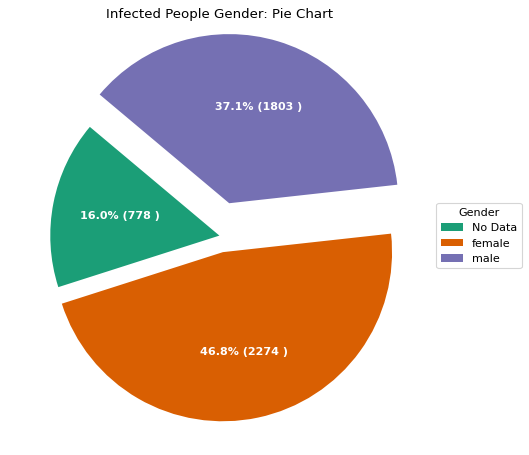

In [ ]:
dff1 = dff.groupby('sex').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = dff1['counts']
categories = dff1['sex']
explode = [0,0.1,0.2]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

ax.legend(wedges, categories, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Infected People Gender: Pie Chart")
plt.show()
fig.savefig('infected_gender_pie.jpg')

**Generally we remove missing Data but here already there is very little data so we dosen't want to loose that entire row because of it and we also want to now how much data is missing**

## <font color='green'>46.8% of Female population are Effected</font>
## <font color='green'>Most of the people who effected are Females</font>
## <font color='green'>Roughly speaking both male and female are similary Effected so infection spread doesnot depend of sex much</font>

**Analysis on Few Patients on the records**

In [ ]:
de1=dff['confirmed_date'].value_counts()
de2=de2=dff['released_date'].value_counts()
list1=[]
for i,j in de1.iteritems():
  list1.append(i)
for i,j in de2.iteritems():
  list1.append(i)
list1.sort()
list1=mylist = list(dict.fromkeys(list1))
d1={}
d2={}

for i in list1:
  d1[i]=0
  d2[i]=0

for i,j in de1.iteritems():
  d1[i]=d1[i]+j

for i,j in de2.iteritems():
  d2[i]=d2[i]+j
print("confirmed cases data")
d1

confirmed cases data


{'2020-01-26': 1,
 '2020-01-27': 3,
 '2020-01-30': 6,
 '2020-01-31': 7,
 '2020-02-05': 10,
 '2020-02-06': 3,
 '2020-02-09': 10,
 '2020-02-10': 1,
 '2020-02-12': 0,
 '2020-02-16': 23,
 '2020-02-17': 0,
 '2020-02-18': 7,
 '2020-02-19': 15,
 '2020-02-20': 17,
 '2020-02-21': 69,
 '2020-02-22': 137,
 '2020-02-23': 139,
 '2020-02-24': 63,
 '2020-02-25': 152,
 '2020-02-26': 105,
 '2020-02-27': 143,
 '2020-02-28': 254,
 '2020-02-29': 251,
 '2020-03-01': 174,
 '2020-03-02': 94,
 '2020-03-03': 86,
 '2020-03-04': 243,
 '2020-03-05': 77,
 '2020-03-06': 68,
 '2020-03-07': 49,
 '2020-03-08': 86,
 '2020-03-09': 88,
 '2020-03-10': 248,
 '2020-03-11': 68,
 '2020-03-12': 56,
 '2020-03-13': 45,
 '2020-03-14': 29,
 '2020-03-15': 15,
 '2020-03-16': 32,
 '2020-03-17': 45,
 '2020-03-18': 67,
 '2020-03-19': 55,
 '2020-03-20': 28,
 '2020-03-21': 42,
 '2020-03-22': 49,
 '2020-03-23': 14,
 '2020-03-24': 30,
 '2020-03-25': 26,
 '2020-03-26': 44,
 '2020-03-27': 29,
 '2020-03-28': 65,
 '2020-03-29': 105,
 '2020-03-

In [ ]:
print("Recovery Data")
d2

Recovery Data


{'2020-01-26': 0,
 '2020-01-27': 0,
 '2020-01-30': 0,
 '2020-01-31': 0,
 '2020-02-05': 0,
 '2020-02-06': 0,
 '2020-02-09': 3,
 '2020-02-10': 0,
 '2020-02-12': 13,
 '2020-02-16': 0,
 '2020-02-17': 1,
 '2020-02-18': 0,
 '2020-02-19': 2,
 '2020-02-20': 0,
 '2020-02-21': 3,
 '2020-02-22': 0,
 '2020-02-23': 0,
 '2020-02-24': 1,
 '2020-02-25': 0,
 '2020-02-26': 3,
 '2020-02-27': 0,
 '2020-02-28': 0,
 '2020-02-29': 4,
 '2020-03-01': 1,
 '2020-03-02': 4,
 '2020-03-03': 37,
 '2020-03-04': 53,
 '2020-03-05': 6,
 '2020-03-06': 10,
 '2020-03-07': 10,
 '2020-03-08': 7,
 '2020-03-09': 15,
 '2020-03-10': 13,
 '2020-03-11': 47,
 '2020-03-12': 26,
 '2020-03-13': 55,
 '2020-03-14': 40,
 '2020-03-15': 24,
 '2020-03-16': 24,
 '2020-03-17': 48,
 '2020-03-18': 73,
 '2020-03-19': 67,
 '2020-03-20': 107,
 '2020-03-21': 9,
 '2020-03-22': 51,
 '2020-03-23': 53,
 '2020-03-24': 56,
 '2020-03-25': 107,
 '2020-03-26': 43,
 '2020-03-27': 44,
 '2020-03-28': 94,
 '2020-03-29': 55,
 '2020-03-30': 11,
 '2020-03-31': 7,


<Figure size 720x2160 with 0 Axes>

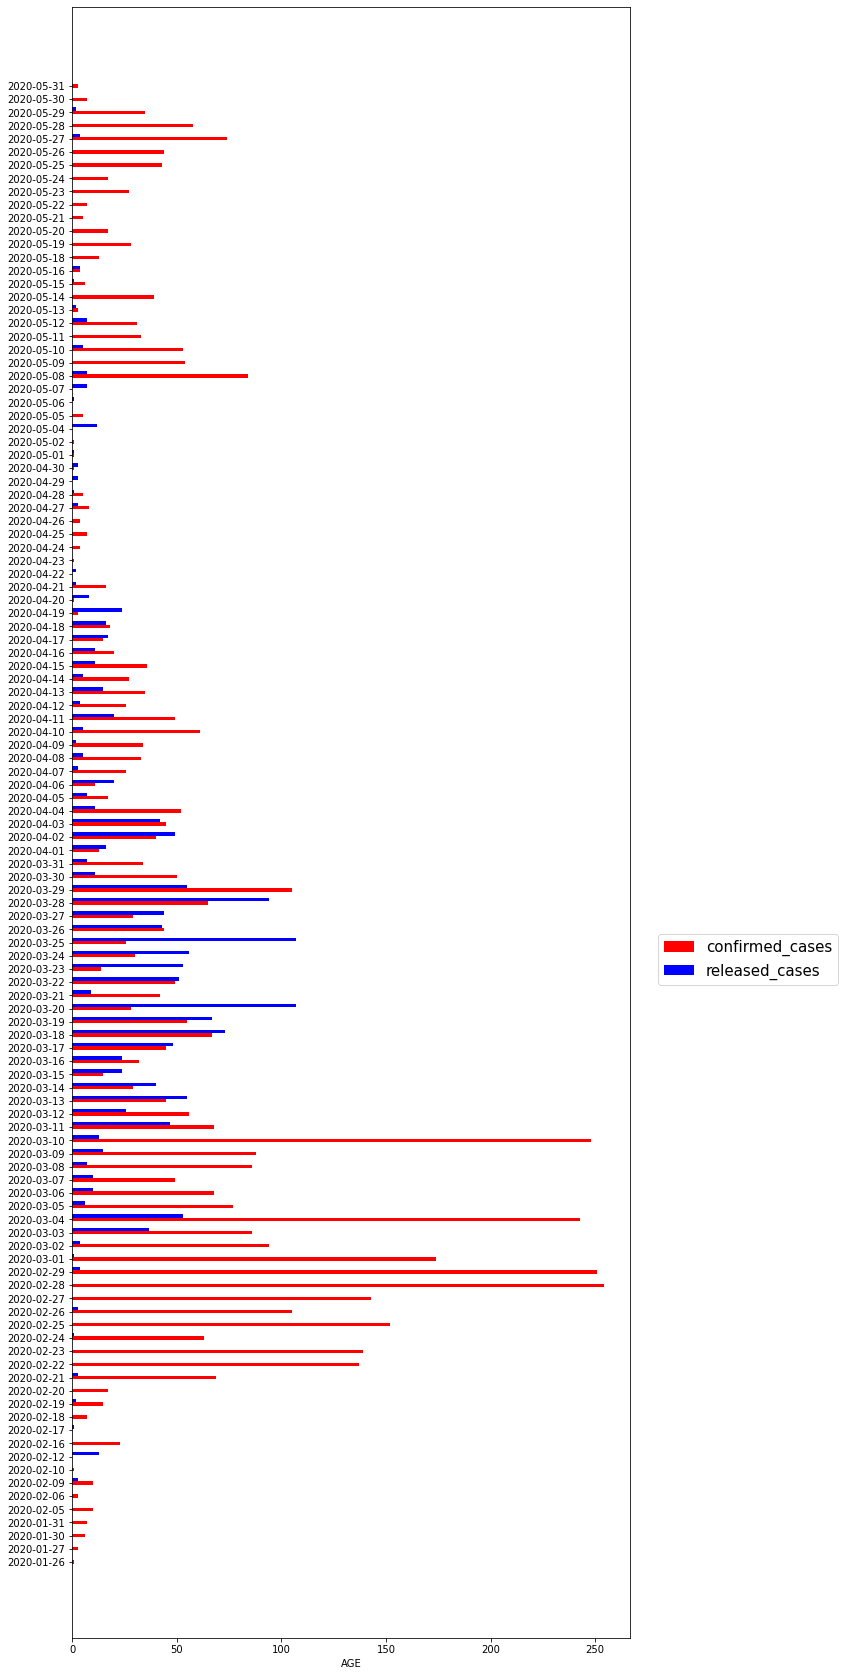

In [ ]:
de1=dff['confirmed_date'].value_counts()
de2=de2=dff['released_date'].value_counts()
list1=[]
for i,j in de1.iteritems():
  list1.append(i)
for i,j in de2.iteritems():
  list1.append(i)
list1.sort()
list1=mylist = list(dict.fromkeys(list1))
d1={}
d2={}

for i in list1:
  d1[i]=0
  d2[i]=0

for i,j in de1.iteritems():
  d1[i]=d1[i]+j

for i,j in de2.iteritems():
  d2[i]=d2[i]+j


del d1['No Data']
del d2['No Data']
list1.remove('No Data')
plt.figure(figsize=(10,30))
fig, ax = plt.subplots(figsize=(10, 30))
plt.xlabel("AGE")
pos = np.arange(len(list1))
ax.barh(pos+0.00,list(d1.values()),color='r',height=0.25,label='confirmed_cases')
ax.barh(pos+0.25,list(d2.values()),color='b',height=0.25,label='released_cases')
plt.yticks(pos,list1)
plt.legend(fontsize=15,loc=(1.05,0.4))
plt.show()
fig.savefig('patient_some.png')

**Here we can see That earlier There were many confirmed_cases and actually recovery of patients started from 02-17-2020 and as the time past raising of infected cases started decreasing and released_cases started incresing and after again we can see more confirmed cases but during that they are many people recoverd as well but we donot have proper data regarding it**

**So As per the records**

**Here 05-11-2020 is the only after a long time where we could actual see again raise in the cases**

**Here we saw highest raise in the cases on 02-28-2020 with 254 patients confirmed** 

**Highest recovery of cases on 2020-03-25 and 2020-03-20 with 107 patients recoverd**



In [ ]:
df9=pd.read_csv('TimeGender.csv')
df9.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


**Since we have very little amount of data so lets us try not to remove any data points from the data frame instead**

In [ ]:
#https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
for i in df9.columns:
  df9[i].fillna("No Data", inplace = True)

In [ ]:
# sorting data frame by a date
df9= df9.sort_values(by=['date'],ascending=True)
df9.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [ ]:
df9['sex'].value_counts()
#so no missing values here

male      91
female    91
Name: sex, dtype: int64

In [ ]:
dates=[]
for i in range(len(df9)):
  r=df9.iloc[i].loc['date']
  dates.append(r)
dates.sort()
dates= list(dict.fromkeys(dates))
confirmedm={}
confirmedf={}
deceasedm={}
deceasedf={}

for i in dates:
  confirmedm[i]=0
  confirmedf[i]=0
  deceasedm[i]=0
  deceasedf[i]=0



for i in range(len(df9)):
  r=df9.iloc[i].loc['date']
  s=df9.iloc[i].loc['sex']
  if s=='male':
    confirmedm[r]=confirmedm[r]+df9.iloc[i].loc['confirmed']
    deceasedm[r]=deceasedm[r]+df9.iloc[i].loc['deceased']
  if s=='female':
    confirmedf[r]=confirmedf[r]+df9.iloc[i].loc['confirmed']
    deceasedf[r]=deceasedf[r]+df9.iloc[i].loc['deceased']



**Infected Cases and Recovered Cases Based on Date and gender** 

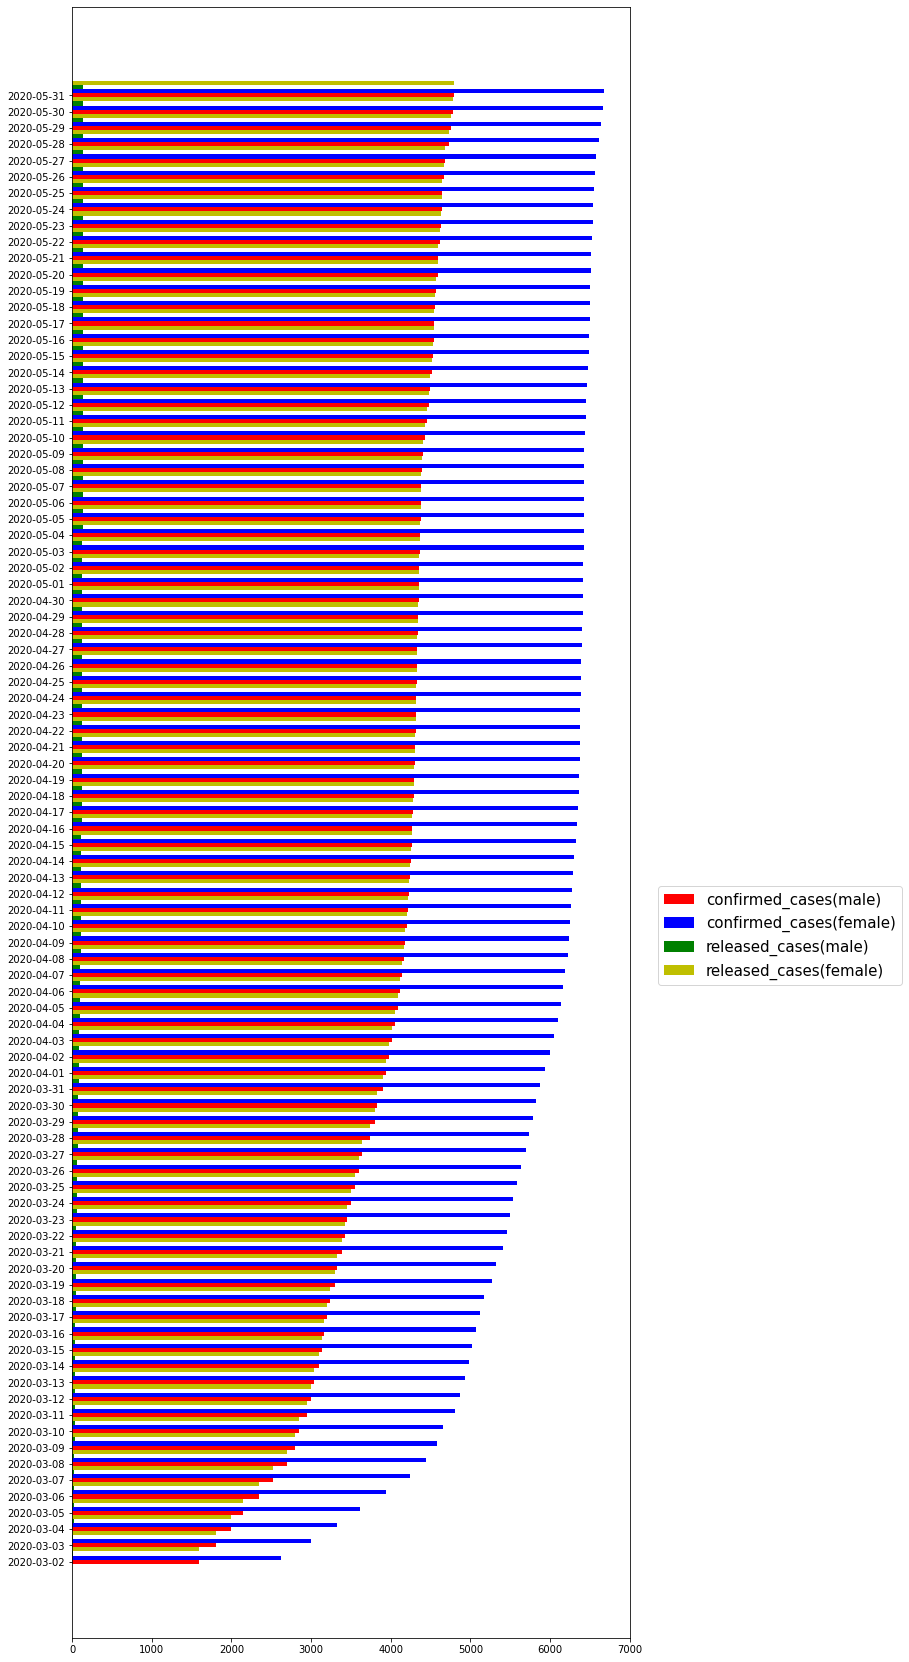

In [ ]:
fig, ax = plt.subplots(figsize=(10, 30))
pos = np.arange(len(dates))
ax.barh(pos+0.00,list(confirmedm.values()),color='r',height=0.25,label='confirmed_cases(male)')
ax.barh(pos+0.25,list(confirmedf.values()),color='b',height=0.25,label='confirmed_cases(female)')
ax.barh(pos+0.50,list(deceasedm.values()),color='g',height=0.25,label='released_cases(male)')
ax.barh(pos+0.75,list(confirmedm.values()),color='y',height=0.25,label='released_cases(female)')
plt.yticks(pos,dates)
plt.legend(fontsize=15,loc=(1.05,0.4))
plt.show()
fig.savefig('big.png')

**Here it is not clear so lets us plot in more simple way**

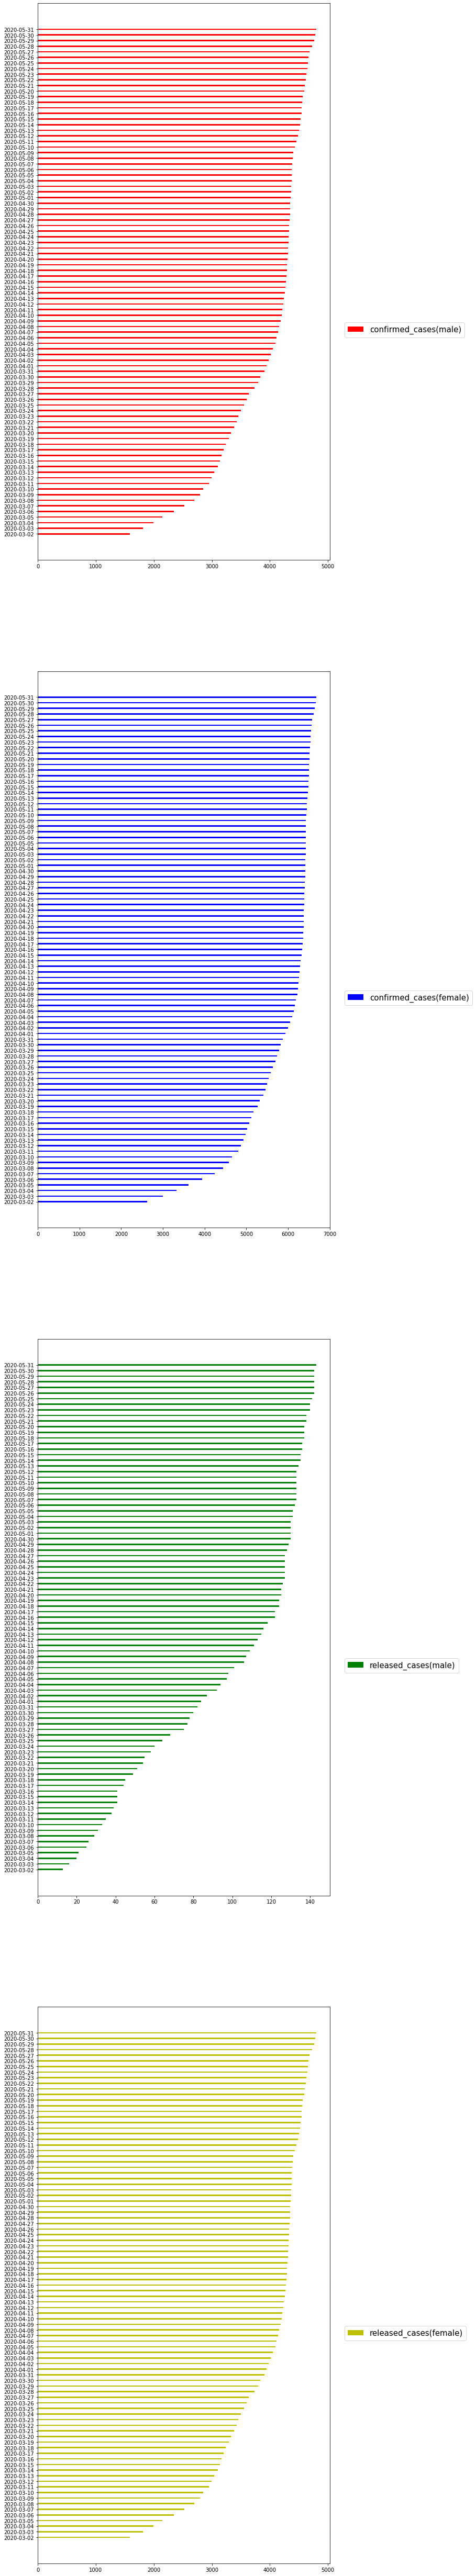

In [ ]:
plt.figure(figsize=(10,90))
pos = np.arange(len(dates))
plt.subplot(4,1,1)
plt.barh(pos,list(confirmedm.values()),color='r',height=0.25,label='confirmed_cases(male)')
plt.yticks(pos,dates)
plt.legend(fontsize=15,loc=(1.05,0.4))
plt.savefig('p1.jpg')
plt.subplot(4,1,2)
plt.barh(pos,list(confirmedf.values()),color='b',height=0.25,label='confirmed_cases(female)')
plt.yticks(pos,dates)
plt.legend(fontsize=15,loc=(1.05,0.4))
plt.savefig('p2.jpg')
plt.subplot(4,1,3)
plt.barh(pos,list(deceasedm.values()),color='g',height=0.25,label='released_cases(male)')
plt.yticks(pos,dates)
plt.legend(fontsize=15,loc=(1.05,0.4))
plt.savefig('p3.jpg')
plt.subplot(4,1,4)
plt.barh(pos,list(confirmedm.values()),color='y',height=0.25,label='released_cases(female)')
plt.yticks(pos,dates)
plt.legend(fontsize=15,loc=(1.05,0.4))
plt.savefig('p4.jpg')
plt.show()

## <font color='green'>Here we can see that the Number of confirmed Cases for Female is little bit high than the confirmed Cases for male.The Reason is more Feamles are effected to virus than males</font>
## <font color='green'>Also we can see there fairly the Number of recovered Cases for Male and Female are almost Similar</font>

**DEPLOYING THE OBSERVATION AND PLOTS FILES IN WEB USING FLASK** 

In [ ]:
!unzip static.zip

Archive:  static.zip
  inflating: static/age_bar.jpg      
  inflating: static/Analysis.html    
  inflating: static/big.png          
  inflating: static/epiccenter_bar.jpg  
  inflating: static/epiccenter_bar.png  
  inflating: static/groups_bar.jpg   
  inflating: static/groups_pie.jpg   
  inflating: static/infected_gender_pie.jpg  
  inflating: static/p1.jpg_fit=scale  
  inflating: static/p4.jpg           
  inflating: static/patient_some.png  
  inflating: static/patientsdiff.jpg  
  inflating: static/provience_case.jpg  
  inflating: static/solve-machine-learning-problems-in-python.html  


In [ ]:
!unzip templates.zip

Archive:  templates.zip
  inflating: templates/index.html    


In [ ]:
!pip install flask_ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask
app = Flask(__name__)

run_with_ngrok(app)

@app.route("/")
def hello():
    return render_template('index.html')

app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://4d40763fb448.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
